## **Imports**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from PIL import Image

## **Step 1 - Load dataset (Resize all images to a fixed size, convert to grayscale, and normalize pixels)**

In [3]:
# Already completed for you
def load_images(image_dir, max_images=None, target_size=(224, 224)):
    images = []
    image_names = []
    for i, filename in enumerate(os.listdir(image_dir)):
        if filename.endswith('.jpg'):
            img = Image.open(os.path.join(image_dir, filename))
            img = img.convert('L')  # Convert to grayscale ('L' mode)
            img = img.resize(target_size)  # Resize to target size
            img_array = np.asarray(img, dtype=np.float32) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array.flatten())  # Flatten to 1D
            image_names.append(filename)
        if max_images and i + 1 >= max_images:
            break
    return np.array(images), image_names

### Extract the dataset's zip file and put the extracted folder's path below

In [6]:
# Directory containing images
image_dir = "static/coco_images_resized" # Your folder path

## **Step 2: Train PCA on the first 2,000 images**

####  Complete the TODO sections below

In [12]:
train_images, train_image_names = load_images(image_dir, max_images=2000, target_size=(224, 224))
print(f"Loaded {len(train_images)} images for PCA training.")

# Apply PCA
k = 100  # Number of principal components (eg: 50)
pca = PCA(n_components=k)
pca.fit(train_images)
print(f"Trained PCA on {len(train_images)} samples.")

Loaded 2000 images for PCA training.
Trained PCA on 2000 samples.


## **Step 3: Transform the first 10,000 images**
#### Complete the TODO section below

In [13]:
transform_images, transform_image_names = load_images(image_dir, max_images=10000, target_size=(224, 224))
print(f"Loaded {len(transform_images)} images for transformation.")
# Transform only the first 10,000 images
reduced_embeddings = pca.transform(transform_images)
print(f"Reduced embeddings for {len(transform_images)} images.")

Loaded 10000 images for transformation.
Reduced embeddings for 10000 images.


## **Step 4: Nearest Neighbor Search**
#### Complete the TODO sections below

In [14]:
def nearest_neighbors(query_embedding, embeddings, top_k=5):
    # query_embedding: The embedding of the query item (e.g., the query image) in the same dimensional space as the other embeddings.
    # embeddings: The dataset of embeddings that you want to search through for the nearest neighbors.
    # top_k: The number of most similar items (nearest neighbors) to return from the dataset.
    # Hint: flatten the "distances" array for convenience because its size would be (1,N)
    # Use euclidean distance
    distances = np.linalg.norm(embeddings - query_embedding, axis=1)
    nearest_indices = np.argsort(distances)[:top_k] #TODO get the indices of ntop k results
    return nearest_indices, distances[nearest_indices]

## **Step 5 - Visualize the results**
#### Feel free to use any other image from the dataset by changing the query_idx variable

Top indices: [   0 2663 9104  775  401]
Top distances: [ 0.       44.0729   44.923977 45.07599  45.2997  ]


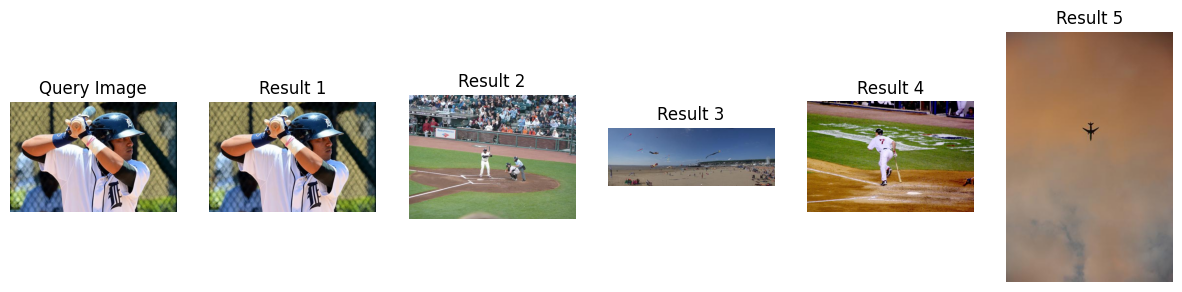

In [15]:
# Example Query
query_idx = 0  # Index of the query image (you can change this)
query_embedding = reduced_embeddings[query_idx]
top_indices, top_distances = nearest_neighbors(query_embedding, reduced_embeddings)
print("Top indices:", top_indices)
print("Top distances:", top_distances)

# Step 4: Visualize Results with Original Color Images
# Already completed
def visualize_results_in_color(query_idx, top_indices):
    fig, axes = plt.subplots(1, len(top_indices) + 1, figsize=(15, 5))
    # Show query image
    query_image = Image.open(os.path.join(image_dir, transform_image_names[query_idx]))  # Load original image
    axes[0].imshow(query_image)  # Show in colored format/original.
    axes[0].set_title("Query Image")
    axes[0].axis("off")
    # Show top results
    for i, idx in enumerate(top_indices):
        result_image = Image.open(os.path.join(image_dir, transform_image_names[idx]))  # Load original image
        axes[i + 1].imshow(result_image)  # Show in colored format/original
        axes[i + 1].set_title(f"Result {i+1}")
        axes[i + 1].axis("off")
    plt.show()

visualize_results_in_color(query_idx, top_indices)